In [39]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob as gb
import pandas as pd
import cv2
import seaborn as sns
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
# Cell 2
train_path = r'C:\Users\user\Desktop\AIII\buildings-vs-forests\traning_set'
test_path = r'C:\Users\user\Desktop\AIII\buildings-vs-forests\test_set'

# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [41]:
# Transfer learning with ResNet50
resnet_model = tf.keras.Sequential([
    tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(256, 256, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Freeze the ResNet50 layers
resnet_model.layers[0].trainable = False

# Compile the model
resnet_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Train the model for more epochs
history = resnet_model.fit(
    train_data,
    epochs=10,
    validation_data=validation_data
)


Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.5541 - loss: 0.6806 - val_accuracy: 0.7477 - val_loss: 0.6311
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.6958 - loss: 0.6274 - val_accuracy: 0.7849 - val_loss: 0.5923
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.7243 - loss: 0.6035 - val_accuracy: 0.6441 - val_loss: 0.5866
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.7403 - loss: 0.5756 - val_accuracy: 0.8356 - val_loss: 0.5356
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.7550 - loss: 0.5575 - val_accuracy: 0.8198 - val_loss: 0.5232
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.7530 - loss: 0.5414 - val_accuracy: 0.7545 - val_loss: 0.5072
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.7890 - loss: 0.5289 - val_accuracy: 0.8750 - val_loss: 0.4761
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.7827 - loss: 0.5258 - val_accu

In [42]:
# Cell 3
# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Load and prepare validation data
validation_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 3555 images belonging to 2 classes.
Found 888 images belonging to 2 classes.


In [43]:
# Cell 4
# Load and prepare test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)


Found 911 images belonging to 2 classes.


In [44]:
# Cell 5
# Transfer learning with ResNet50
resnet_model = tf.keras.Sequential([
    tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(256, 256, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Freeze the ResNet50 layers
resnet_model.layers[0].trainable = False

# Compile the model
resnet_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])


Epoch 1/10


E:\Anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


112/112 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.5341 - loss: 0.6900 - val_accuracy: 0.7106 - val_loss: 0.6360
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.6546 - loss: 0.6390 - val_accuracy: 0.7320 - val_loss: 0.6046
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.7213 - loss: 0.6006 - val_accuracy: 0.7061 - val_loss: 0.5875
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.7261 - loss: 0.5803 - val_accuracy: 0.8074 - val_loss: 0.5571
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.7785 - loss: 0.5561 - val_accuracy: 0.7365 - val_loss: 0.5467
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.7780 - loss: 0.5469 - val_accuracy: 0.8153 - val_loss: 0.5230
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.7934 - loss: 0.5318 - val_accuracy: 0.8052 - val_loss: 0.5172
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.8104 - loss: 0.5030 - val_accuracy: 0.809

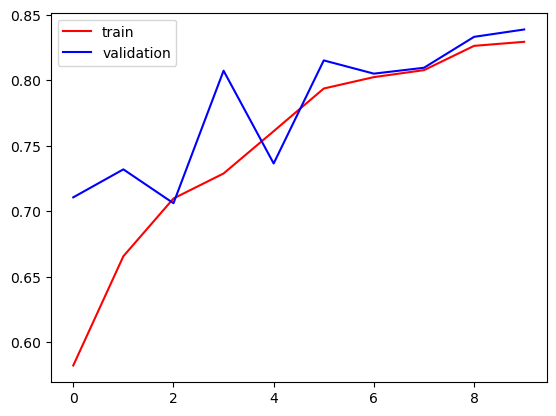

In [45]:
# Cell 6
# Train the model
history = resnet_model.fit(train_data, epochs=10, validation_data=validation_data)

# Plot training history
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


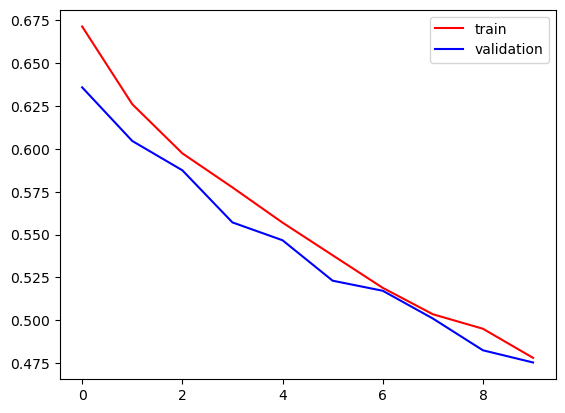

In [46]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [47]:
# Cell 7
# Evaluate the model on test data
loss, accuracy = resnet_model.evaluate(test_data)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8859 - loss: 0.4498
Test Loss: 0.4406782388687134
Test Accuracy: 0.8858397603034973


In [48]:
# Cell 8
# Make predictions on test data
predictions = (resnet_model.predict(test_data) > 0.5).astype(int)
true_labels = test_data.classes

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(cm)

# Calculate classification report
print("Classification Report:")
print(classification_report(true_labels, predictions))


29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step
Confusion Matrix:
[[216 221]
 [237 237]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.49      0.49       437
           1       0.52      0.50      0.51       474

    accuracy                           0.50       911
   macro avg       0.50      0.50      0.50       911
weighted avg       0.50      0.50      0.50       911

